# Sensitivity Analysis of Results

This notebook focuses on conducting a sensitivity analysis of our results. We aggregate the outcomes derived from the Number Cruncher Sensitivity Notebook to create informative boxplots that visualize the impact of various settings on our results.

## Parameter Settings
The following parameters are under consideration:

- **Number of Road Inspectors:** [100, 110, 120]
- **Inclusion of Day Occurrence Weights:** With or Without
- **Minimum Euclidean Ranges:** [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
- **Minimum Distance Using the Network:** [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]

This analysis enables us to explore how these parameters impact the results, providing valuable insights into the sensitivity of our model.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def generate_boxplot(name, number_of_inspectors, min_ranges, min_direct_ranges, file_path, threshold, xlim):
    """
    Generate Boxplots for Sensitivity Analysis

    This function generates boxplots to visualize the results of sensitivity analysis for the road inspector allocation model. It uses various input parameters to customize the analysis and plot the data.

    Args:
    - name (str): A string representing the name of the setting.
    - number_of_inspectors (int): The number of road inspectors considered in the analysis.
    - min_ranges (list): A list of minimum Euclidean ranges for sensitivity analysis.
    - min_direct_ranges (list): A list of minimum distances using the network for sensitivity analysis.
    - file_path (str): The file path where the data is stored.
    - threshold (float): A threshold for excluding outliers in the boxplots.
    - xlim (tuple): A tuple specifying the limits of the x-axis.

    Returns:
    - None
    """

    # Create a list to store all dataframes
    dfs = []

    # Read dataframes and store them in the list
    for i in range(len(min_ranges)):
        min_range = min_ranges[i]
        min_direct_range = min_direct_ranges[i]
        df = pd.read_csv(f"{file_path}Results_{number_of_inspectors}_{name}_{min_range}_{min_direct_range}.csv")
        dfs.append(df)

    # Initialize a list to store removed data points
    removed_data_points = []

    # Exclude outliers above a threshold and store them
    data_to_plot = []
    for df in dfs:
        data = df['Average response time [min]']
        removed_data = data[data > threshold]
        removed_data_points.append(removed_data.values)
        data = data[data <= threshold]
        data_to_plot.append(data)

    # Calculate the lowest average response time from the averages of all dataframes
    min_avg_response_time = min([data.mean() for data in data_to_plot])

    # Create a boxplot
    plt.figure(figsize=(10, 6))
    
    # Set colors for the boxes (you can change colors as needed)
    box_colors = ['lightgray' if data.mean() != min_avg_response_time else 'steelblue' for data in data_to_plot]
    
    bp = plt.boxplot(data_to_plot, labels=min_ranges, vert=False, showfliers=True, patch_artist=True)
    
    for box, color in zip(bp['boxes'], box_colors):
        box.set(facecolor=color)

    # Create a legend for the box colors
    legend_labels = [Patch(facecolor='steelblue', label=f'Lowest Avg: {min_avg_response_time:.2f}'),
                     Patch(facecolor='lightgray', label='Other')]
    
    plt.xlabel('Average Response Time [min]')
    plt.ylabel('Min Range')
    plt.title(f'Boxplot of Average Response Time [min] from Multiple settings, {number_of_inspectors} inspectors, {name}, Lowest Avg: {min_avg_response_time:.2f}')

    # Set the x-axis limits
    plt.xlim(xlim)

    # Display the legend
    plt.legend(handles=legend_labels, loc='lower right')
    
    plt.grid(True, axis="x", linestyle="--")
    plt.savefig(f'Boxplots/Boxplots_{name}_{number_of_inspectors}')
    plt.show()


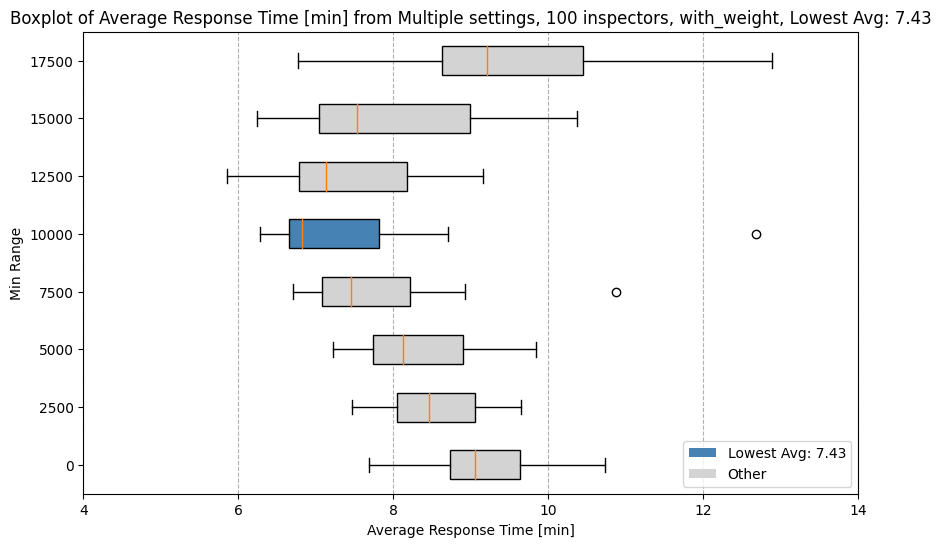

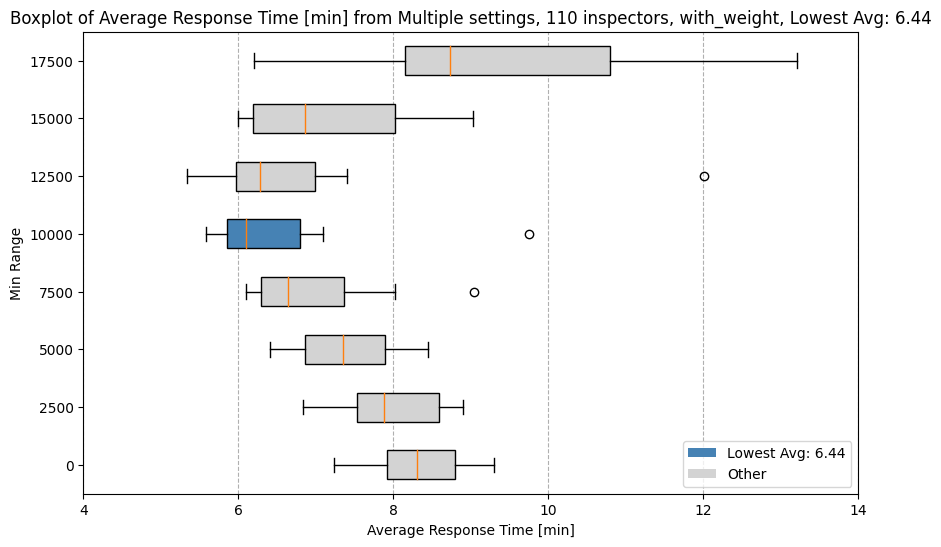

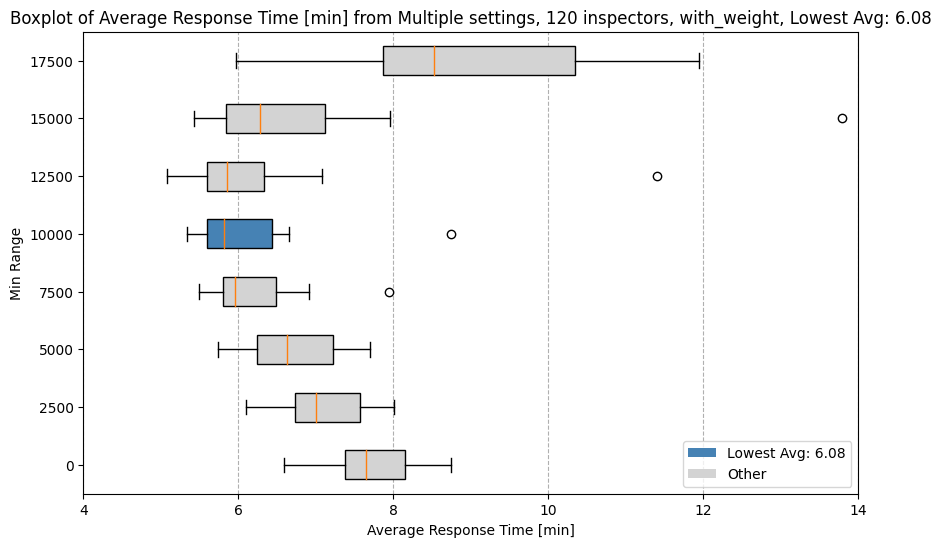

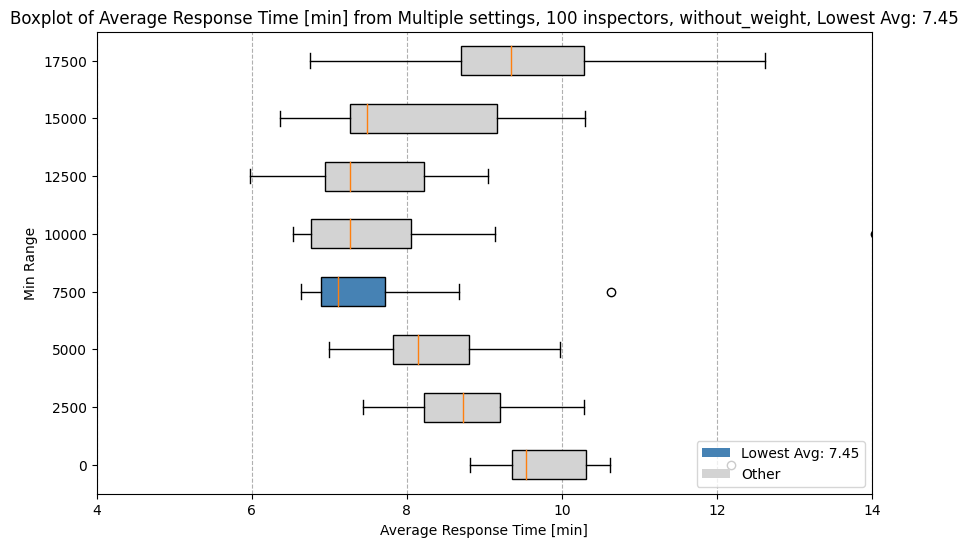

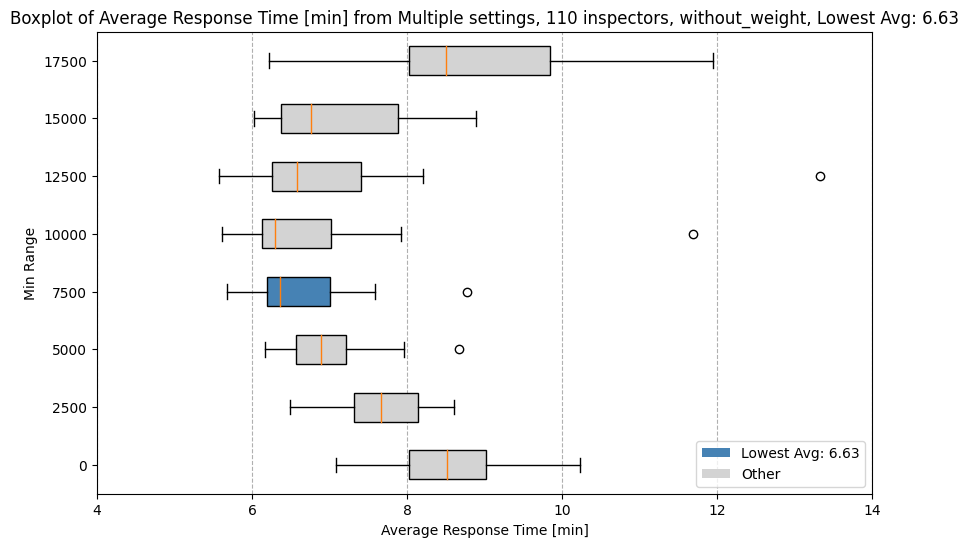

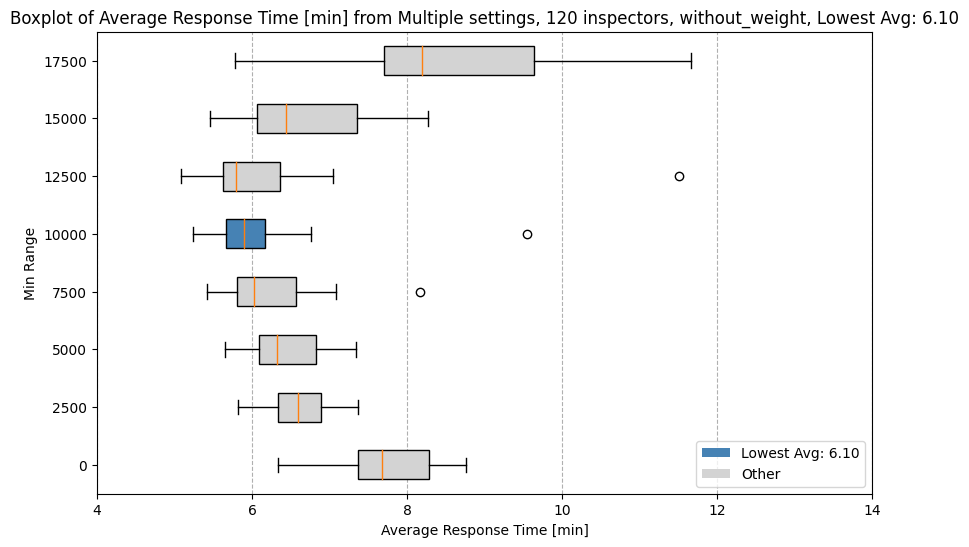

In [24]:
# Define your parameters
names = ["with_weight", 'with_weight', 'with_weight', 'without_weight', 'without_weight', 'without_weight']
number_of_inspectors = [100, 110, 120, 100, 110, 120]
min_ranges = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]
min_direct_ranges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
file_path = ['result/result_Yixin/', 'result/Heisuke_result/', 'result/Klaas_result/', 'result/Klaas_2_result/', 'result/Martijn_result/', 'result/Martin_result/']
threshold = 50
xlim = (4, 14)

# Call the function
for i in range(len(number_of_inspectors)):
    number_i = number_of_inspectors[i]
    path = file_path[i]
    name = names[i]
    generate_boxplot(name, number_i, min_ranges, min_direct_ranges, path, threshold, xlim)